# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading Dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
# To display all columns within our dataset

pd.set_option('display.max_columns',None)

In [4]:
# it wll show first five rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
# it wll show last five rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [6]:
# it will show the number of rows and column in dataset
df.shape

(119390, 32)

In [7]:
# it will show all columns in the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [10]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

# Handling the null values

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.shape

(119390, 32)

In [14]:
# Observations with zero values for babies, adults, and children simultaneously will be removed. This is because it is not
# possible for all three variables to be zero at the same time.

filter_ = (df['children']==0) & (df['adults']==0) & (df['babies']==0)
df[filter_]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [15]:
df = df[~filter_]

In [16]:
# Replacing null values in the "country" column with the keyword "other".

df['country'].fillna('other',inplace=True)

In [17]:
df.dropna(subset = ['children'],inplace=True)

In [18]:
# Filling the missing values in the 'agent' column by using the mean of the available data.

df['agent'].fillna(df['agent'].mean(), inplace=True)

In [19]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_day_of_month'].astype(str) + '/' + 
                                    df['arrival_date_month'].astype(str) + '/' + df['arrival_date_year'].astype(str))

In [20]:
df.shape

(119206, 33)

# Data Analysis and Visualizations

A correlation matrix displays the statistical relationships between numerical columns. It helps visualize how variables are interconnected and to what degree they influence each other.

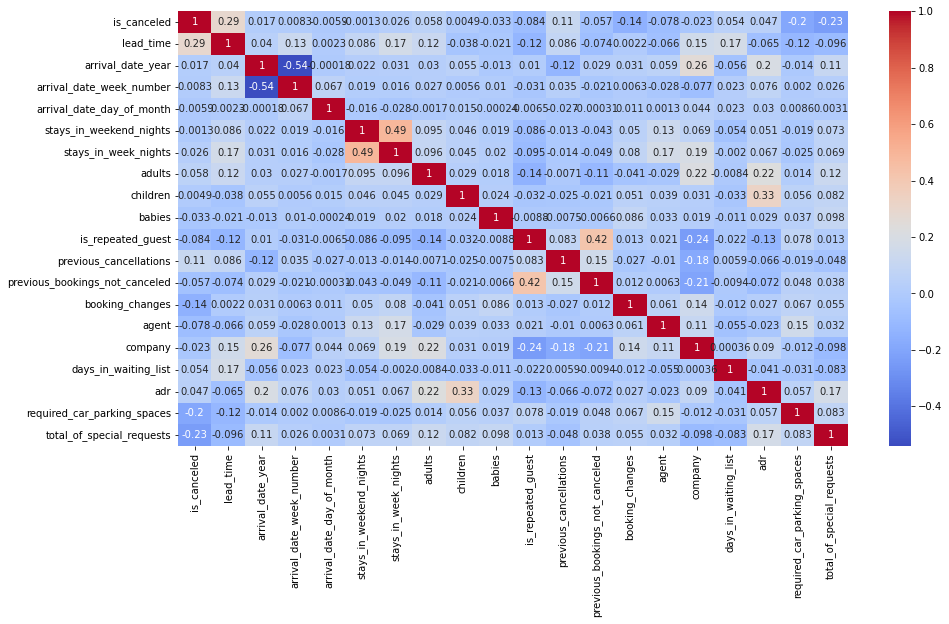

In [21]:
# Correlation Matrix

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [22]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.292930
total_of_special_requests         0.234925
required_car_parking_spaces       0.195696
booking_changes                   0.144821
previous_cancellations            0.110147
is_repeated_guest                 0.083740
agent                             0.078248
adults                            0.058155
previous_bookings_not_canceled    0.057363
days_in_waiting_list              0.054309
adr                               0.046558
babies                            0.032566
stays_in_week_nights              0.025549
company                           0.023439
arrival_date_year                 0.016694
arrival_date_week_number          0.008299
arrival_date_day_of_month         0.005902
children                          0.004862
stays_in_weekend_nights           0.001316
Name: is_canceled, dtype: float64

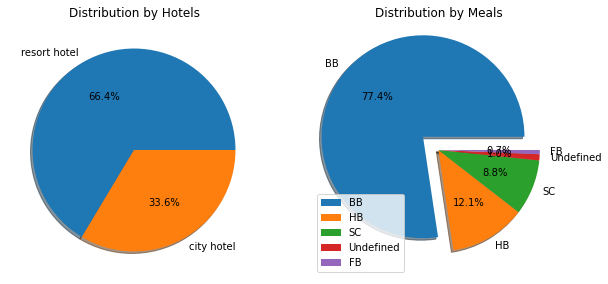

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
labels = ['resort hotel', 'city hotel']
sizes = df['hotel'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Distribution by Hotels')

plt.subplot(1,2,2)
sizes = df['meal'].value_counts()
labels = sizes.index
exp = [0.2,0.0,0.0,0.0,0.0]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=exp)
plt.title('Distribution by Meals')
plt.legend(loc=3)
plt.show()

C:\Users\Parth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


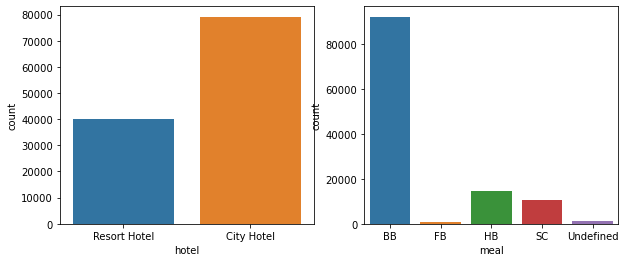

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='hotel')
plt.subplot(1,2,2)
sns.countplot(df['meal'])
plt.show()

# where the majority of guests are coming?

In [25]:
abc = pd.DataFrame(df['country'].value_counts()[:10]).reset_index()
abc

,index,country
0,PRT,48479
1,GBR,12120
2,FRA,10401
3,ESP,8560
4,DEU,7285
5,ITA,3761
6,IRL,3374
7,BEL,2342
8,BRA,2222
9,NLD,2103


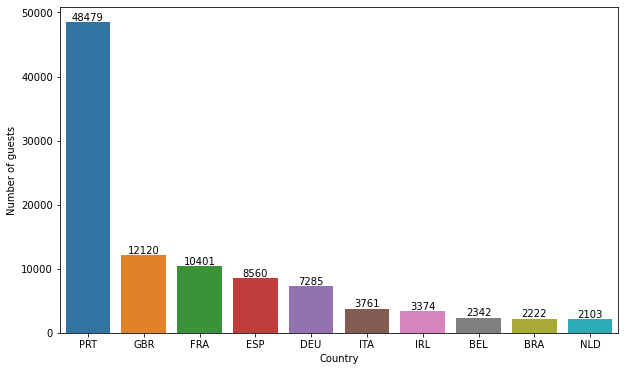

In [26]:
plt.figure(figsize=(10,6))

# Create the barplot
sns.barplot(x='index', data=abc, y='country')
plt.xlabel('Country')
plt.ylabel('Number of guests')

# Add data labels
for index, row in abc.iterrows():
    plt.text(index, row['country'], row['country'], ha='center', va='bottom')

# Show the plot
plt.show()

Around 40.6% of our guests are coming from Portugal.

# Which type of room is the most frequently booked in hotels?

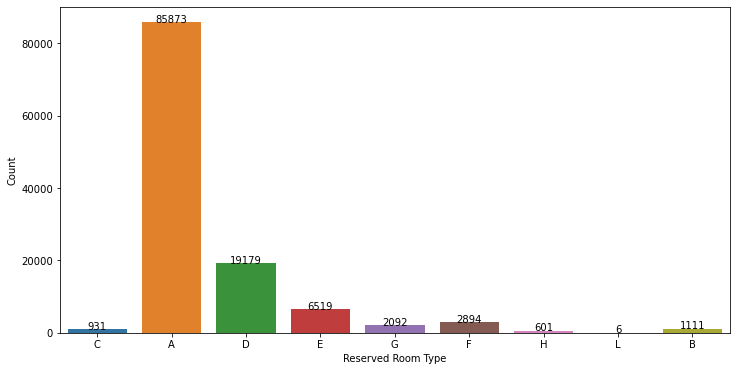

In [27]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='reserved_room_type')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.show()

Based on the data, it's evident that Room Type A is the most frequently reserved room, which is expected as it typically
represents the most budget-friendly option. On the other hand, Room Type L appears to be less popular, potentially indicating 
that these rooms are of higher quality and considered luxury accommodations. To potentially attract more clients, it may be
worthwhile to promote or offer Room Type L as a premium choice.

# Which type of market segment done mostly booking?

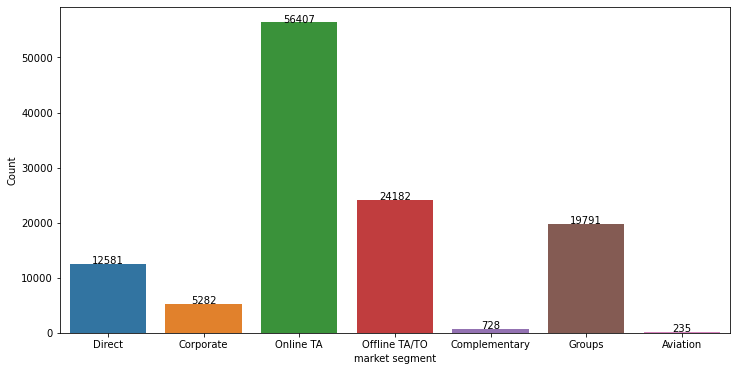

In [28]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df, x = 'market_segment')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('market segment')
plt.ylabel('Count')
plt.show()

We can see from the data that many reservations are made through Online Travel Agents, suggesting that there are many online travel agencies operating in Portugal. Additionally, there are bookings from different market segments like Aviation, which could be related to various flights.

# Which distribution channel is the most commonly used?

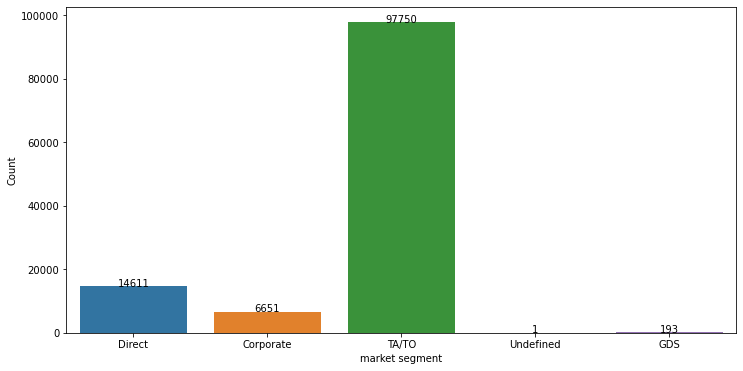

In [29]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df, x = 'distribution_channel')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('market segment')
plt.ylabel('Count')
plt.show()

It looks like most of the bookings come from Travel Agents and Tour Operators. This suggests that hotels often work together with these businesses to promote their rooms.

# Which IDs are more common among the bookings in these agent columns?

In [30]:
booking_of_agent_id = df['agent'].value_counts().reset_index()[:10]

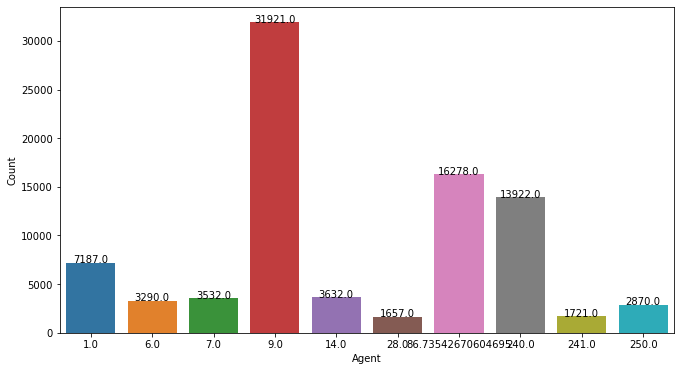

In [31]:
plt.figure(figsize=(11,6))
ax = sns.barplot(data = booking_of_agent_id, x='index', y='agent')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('Agent')
plt.ylabel('Count')
plt.show()

Looking at the chart, it's clear that Agent 9, who is associated with the 1,19,210 family, played a significant role in booking the majority of reservations, accounting for approximately 26.7% of all bookings.

# What kinds of meals are customers ordering?

In [32]:
bookings_with_meal = df['meal'].value_counts().reset_index()[:10]

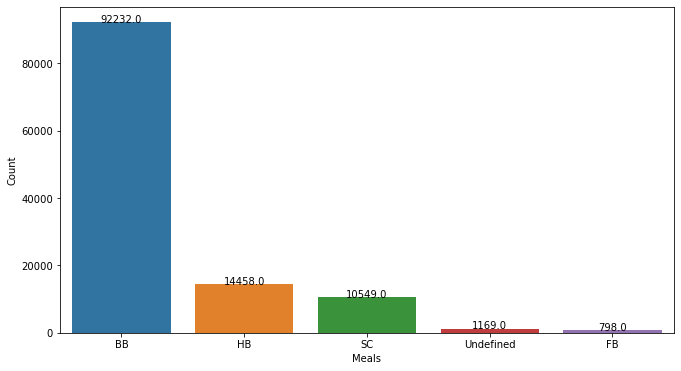

In [33]:
plt.figure(figsize=(11,6))
ax = sns.barplot(data = bookings_with_meal, x='index', y='meal')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('Meals')
plt.ylabel('Count')
plt.show()

From the data, we can see that most customers preferred the "Bed and Breakfast" (BB) option when booking, while fewer customers chose the "Full Board" (FB) option.

# Which payment methods are used most often for making deposits?

In [34]:
deposite_type_booking = df['deposit_type'].value_counts().reset_index()

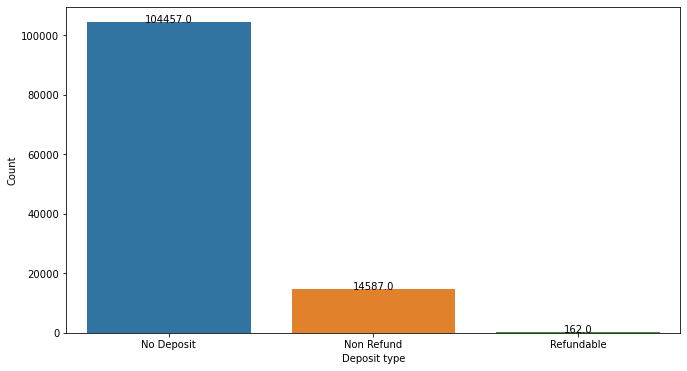

In [35]:
plt.figure(figsize=(11,6))
ax = sns.barplot(data = deposite_type_booking, x='index', y='deposit_type')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('Deposit type')
plt.ylabel('Count')
plt.show()

The majority of our bookings don't require any deposits, and there are very few bookings that are either refundable or non-refundable.

# What type of customer booked the hotel or resort?

In [36]:
customer_type_bookings = df['customer_type'].value_counts().reset_index()

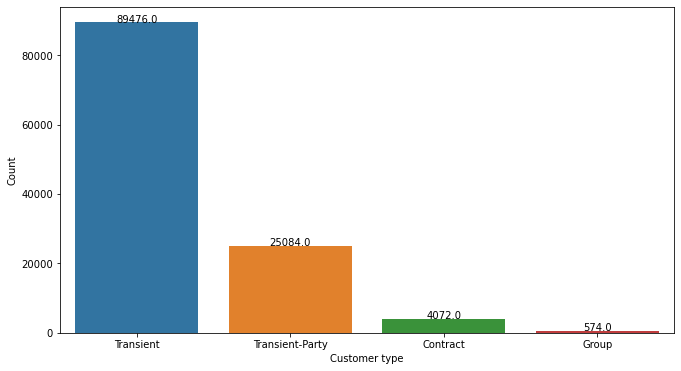

In [37]:
plt.figure(figsize=(11,6))
ax = sns.barplot(data = customer_type_bookings, x='index', y='customer_type')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.xlabel('Customer type')
plt.ylabel('Count')
plt.show()

From the data, it looks like most of the bookings are made by customers who are not staying for an extended period.

# Which Month is the best for hotels?

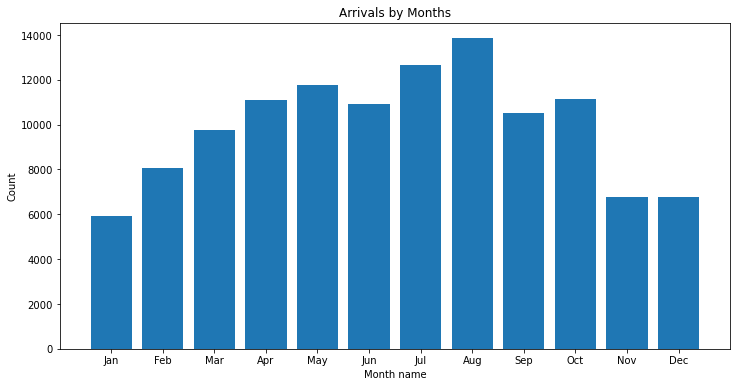

In [38]:
arrival_by_month = df.groupby(df["arrival_date"].dt.month)["hotel"].agg("count")
months= ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Arrivals by Months")
plt.bar(x=arrival_by_month.index, height= arrival_by_month,)

plt.xticks(arrival_by_month.index, months)
plt.xlabel('Month name')
plt.ylabel('Count')
plt.show()

It is evident from the data that there is a higher volume of bookings for both resort and city hotels during the months of August, whereas January records comparatively fewer bookings.

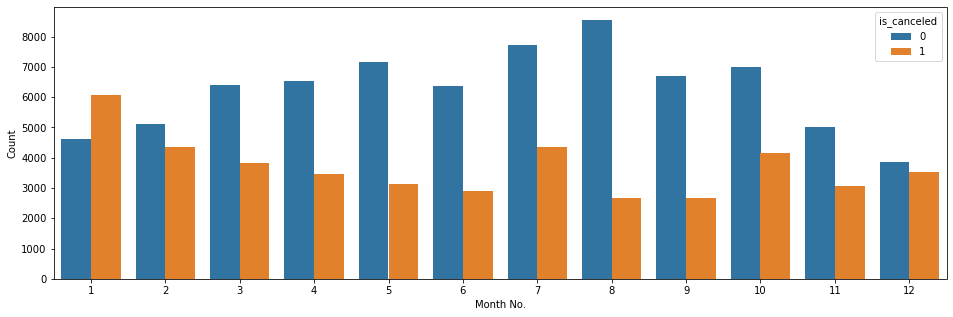

In [39]:
#extract moth from date

df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(16,5))
ax1=sns.countplot(x='month',hue='is_canceled',data=df)
plt.xlabel('Month No.')
plt.ylabel('Count')
plt.show()

From the data, we can deduce that January experiences the highest number of cancellations, while August and September have the lowest cancellation rates.

In [40]:
useless_col = ['days_in_waiting_list', 'assigned_room_type', 'booking_changes','reservation_status','country',
               'days_in_waiting_list','month','company','arrival_date_month','arrival_date_year','arrival_date']

df.drop(useless_col, axis = 1, inplace = True)

In [41]:
df.shape

(119206, 24)

In [42]:
# Identifying categorical columns within a dataset for the purpose of encoding.
category_cols = df.select_dtypes(include='object').columns 

In [43]:
category_cols

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [44]:
category_df = df[category_cols]

In [45]:
category_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient


In [46]:
category_df['res_year']= df['reservation_status_date'].dt.year
category_df['res_month']= df['reservation_status_date'].dt.month
category_df['res_day']= df['reservation_status_date'].dt.day

C:\Users\Parth\AppData\Local\Temp\ipykernel_11776\3633648544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['res_year']= df['reservation_status_date'].dt.year
C:\Users\Parth\AppData\Local\Temp\ipykernel_11776\3633648544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['res_month']= df['reservation_status_date'].dt.month
C:\Users\Parth\AppData\Local\Temp\ipykernel_11776\3633648544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [47]:
category_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,res_year,res_month,res_day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [48]:
category_df.isnull().sum()

hotel                   0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
deposit_type            0
customer_type           0
res_year                0
res_month               0
res_day                 0
dtype: int64

# encoding categorical variables

In [49]:
category_df['hotel'] = category_df['hotel'].map({'Resort Hotel': 0, 'City Hotel':1})

category_df['meal'] = category_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

category_df['market_segment'] = category_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

category_df['distribution_channel'] = category_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

category_df['reserved_room_type'] = category_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

category_df['deposit_type'] = category_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

category_df['customer_type'] = category_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

category_df['res_year'] = category_df['res_year'].map({2015: 0, 2016: 1, 2017: 2})

C:\Users\Parth\AppData\Local\Temp\ipykernel_11776\2661540430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['hotel'] = category_df['hotel'].map({'Resort Hotel': 0, 'City Hotel':1})
C:\Users\Parth\AppData\Local\Temp\ipykernel_11776\2661540430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['meal'] = category_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
C:\Users\Parth\AppData\Local\Temp\ipykernel_11776\2661540430.py:5: SettingWithCopyWarning: 
A value 

In [50]:
list(category_df.columns)

['hotel',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'res_year',
 'res_month',
 'res_day']

In [51]:
df.drop(['hotel','meal','market_segment','distribution_channel','reserved_room_type',
         'deposit_type','customer_type','reservation_status_date'], axis=1, inplace=True)

In [52]:
df.shape

(119206, 16)

In [53]:
combined_df = pd.concat([df,category_df], axis=1)

In [54]:
combined_df.isnull().sum()

is_canceled                         0
lead_time                           0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
agent                               0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
hotel                               0
meal                                0
market_segment                      0
distribution_channel                0
reserved_room_type                  0
deposit_type                        0
customer_type                       0
res_year                          181
res_month                           0
res_day                             0
dtype: int64

In [55]:
combined_df.dropna(inplace=True)

In [56]:
combined_df.isnull().sum()>0

is_canceled                       False
lead_time                         False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
agent                             False
adr                               False
required_car_parking_spaces       False
total_of_special_requests         False
hotel                             False
meal                              False
market_segment                    False
distribution_channel              False
reserved_room_type                False
deposit_type                      False
customer_type                     False
res_year                          False
res_month                         False


In [57]:
combined_df.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,res_year,res_month,res_day
0,0,342,27,1,0,0,2,0.0,0,0,0,0,86.735427,0.0,0,0,0,0,0,0,0,0,0,0.0,7,1
1,0,737,27,1,0,0,2,0.0,0,0,0,0,86.735427,0.0,0,0,0,0,0,0,0,0,0,0.0,7,1
2,0,7,27,1,0,1,1,0.0,0,0,0,0,86.735427,75.0,0,0,0,0,0,0,1,0,0,0.0,7,2
3,0,13,27,1,0,1,1,0.0,0,0,0,0,304.000000,75.0,0,0,0,0,1,1,1,0,0,0.0,7,2
4,0,14,27,1,0,2,2,0.0,0,0,0,0,240.000000,98.0,0,1,0,0,2,2,1,0,0,0.0,7,3


In [58]:
combined_df.var()

is_canceled                           0.233047
lead_time                         11386.945437
arrival_date_week_number            185.234532
arrival_date_day_of_month            77.087002
stays_in_weekend_nights               0.990471
stays_in_week_nights                  3.604116
adults                                0.331311
children                              0.159300
babies                                0.009523
is_repeated_guest                     0.029134
previous_cancellations                0.710042
previous_bookings_not_canceled        2.247874
agent                             10603.157013
adr                                2544.930394
required_car_parking_spaces           0.060289
total_of_special_requests             0.629110
hotel                                 0.223253
meal                                  1.139574
market_segment                        2.011916
distribution_channel                  0.464513
reserved_room_type                    1.266943
deposit_type 

In [59]:
combined_df['lead_time']= np.log(combined_df['lead_time'] + 1)
combined_df['adr']= np.log(combined_df['adr'] + 1)
# combined_df['company']= np.log(combined_df['company'] + 1)
combined_df['agent']= np.log(combined_df['agent'] + 1)
combined_df['arrival_date_week_number']= np.log(combined_df['arrival_date_week_number'] + 1)
combined_df['arrival_date_day_of_month']= np.log(combined_df['arrival_date_day_of_month'] + 1)

C:\Users\Parth\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 This transformation is commonly used to reduce the impact of extreme values and make the data more suitable for certain statistical and machine learning techniques.

In [60]:
combined_df.var()

is_canceled                        0.233047
lead_time                          2.581441
arrival_date_week_number           0.441408
arrival_date_day_of_month          0.506126
stays_in_weekend_nights            0.990471
stays_in_week_nights               3.604116
adults                             0.331311
children                           0.159300
babies                             0.009523
is_repeated_guest                  0.029134
previous_cancellations             0.710042
previous_bookings_not_canceled     2.247874
agent                              2.324244
adr                                0.515869
required_car_parking_spaces        0.060289
total_of_special_requests          0.629110
hotel                              0.223253
meal                               1.139574
market_segment                     2.011916
distribution_channel               0.464513
reserved_room_type                 1.266943
deposit_type                       0.968178
customer_type                   

In [61]:
combined_df.dropna(inplace=True)

In [62]:
# Segmenting the dataset for utilization in machine learning models.

x_train,x_test,y_train,y_test=train_test_split(combined_df.drop(['is_canceled'], axis=1),
                                               combined_df['is_canceled'], test_size=0.3)

# Machine learning models

1. Logistic Regression
2. K-Nearest Neighbors Algorithm
3. Decision Tree Classification Algorithm
4. Random Forest Algorithm

# Logistic Regression

Logistic regression comes under the most popular Supervised Machine Learning algorithms. Logistic regression predicts the categorical dependent variable using a given set of independent variables. The categorical dependent variable should be either Yes or No, 0 or 1, true or false, etc. Logistic regression is much comparable to Linear Regression only implementation is different. Linear Regression solves the Regression problems, and Logistic regression is used for solving the classification problems. Instead of fitting the regression line, In logistic regression, we fit the sigmoid S function, which predicts two maximum values(0,1). The curve from the logistic function indicates the likelihood of something such as whether rain comes or not based on weather conditions.

In [63]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score: {acc_lr:.4f}")
print("Confusion Matrix:")
for row in conf:
    print(" ".join(map(str, row)))
print("Classification Report:")
print(clf_report)

C:\Users\Parth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.8133
Confusion Matrix:
21396 1135
5531 7646
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87     22531
           1       0.87      0.58      0.70     13177

    accuracy                           0.81     35708
   macro avg       0.83      0.76      0.78     35708
weighted avg       0.82      0.81      0.80     35708



# Applying KNN Algorithm on Hotel Booking Cancellation Dataset

K-Nearest Neighbor is another effortless supervised Machine Learning algorithm. KNN algorithm assumes the similarities between new data and available data. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. KNN is used to solve both classification and regression problems. K-NN is a non-parametric algorithm, which means it does not make any assumptions on underlying data. KNN is a lazy learner algorithm because the KNN algorithm stores the dataset during the training phase. When KNN gets new data, then it classifies that data into a category that is much similar to the new data. Example: Suppose, we have an image of an animal that looks like a cat and a dog, but we want to understand whether it is a cat or a dog. Using the KNN algorithm we can perform this identification, as it works on similarity dimensions. Our KNN model will find the similar features of the new data set to the cats and dogs images, and based on the most similar features it will put it in either the cat or dog category. To find the nearest value we use the Euclidean distance.

In [64]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score: {acc_knn:.4f}")
print("Confusion Matrix:")
for row in conf:
    print(" ".join(map(str, row)))
print("Classification Report:")
print(clf_report)

Accuracy Score: 0.8909
Confusion Matrix:
21750 781
3116 10061
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     22531
           1       0.93      0.76      0.84     13177

    accuracy                           0.89     35708
   macro avg       0.90      0.86      0.88     35708
weighted avg       0.89      0.89      0.89     35708



# Decision Tree Classification Algorithm

The Decision Tree algorithm belongs to the family of non-parametric, supervised learning algorithms. It allows for solving regression and classification problems too.

In [65]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score: {acc_dtc:.4f}")
print("Confusion Matrix:")
for row in conf:
    print(" ".join(map(str, row)))
print("Classification Report:")
print(clf_report)

Accuracy Score: 0.9501
Confusion Matrix:
21620 911
870 12307
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     22531
           1       0.93      0.76      0.84     13177

    accuracy                           0.89     35708
   macro avg       0.90      0.86      0.88     35708
weighted avg       0.89      0.89      0.89     35708



# Random Forest Algorithm

Random Forest is a popular supervised machine learning algorithm. The random forest algorithm implements both Classification and Regression problems in ML. The Random Forest is a classifier that includes several decision trees instead of relying on one decision tree, the random forest takes the prediction from each tree, and based on the majority votes of predictions, it predicts the final output. The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [66]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

acc_rfc = accuracy_score(y_test, y_pred_rfc)
conf = confusion_matrix(y_test, y_pred_rfc)
clf_report = classification_report(y_test, y_pred_rfc)

print(f"Accuracy Score: {acc_rfc:.4f}")
print("Confusion Matrix:")
for row in conf:
    print(" ".join(map(str, row)))
print("Classification Report:")
print(clf_report)

Accuracy Score: 0.9540
Confusion Matrix:
22342 189
1454 11723
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     22531
           1       0.98      0.89      0.93     13177

    accuracy                           0.95     35708
   macro avg       0.96      0.94      0.95     35708
weighted avg       0.96      0.95      0.95     35708



# Summary:

1.The majority of guests originated from European countries, with Portugal being the most prominent, accounting for approximately 40.6% of the total guests.

2.Room type A is the most frequently booked room, likely due to its affordability. Conversely, room type L appears to be less popular, possibly indicating that it represents a luxury option worth promoting to attract a broader clientele.

3.Various booking channels are utilized by guests, with the most preferred being TA/TO.

4.Couples constitute the most common type of guests, suggesting that the hotel can tailor its services to meet the needs of couples to enhance revenue.

5.The Bed and Breakfast meal package is the most commonly chosen option, while the full board meal package is selected by a smaller number of guests. This trend might imply the presence of popular external dining options. Additionally, a significant number of guests opt for a no meal package.

6.Transient bookings are the most frequent.

7.City hotels receive approximately 60% of the bookings, with Resort hotels accounting for the remaining 40%. Consequently, City hotels experience higher occupancy rates than Resort hotels.

8.The Average Daily Rate (ADR) shows a consistent year-over-year increase.

9.July and August emerge as the busiest and most profitable months for both types of hotels.

10.August stands out as the month with the highest ADR and booking activity.